In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

3.0.2
0.9.0


In [3]:
!pip install pywaffle

  Running setup.py bdist_wheel for pywaffle ... done
  Stored in directory: /Users/suggu/Library/Caches/pip/wheels/40/41/69/3c2261c863efd83871399be78d57179ff72b4f048cca96de4d
Successfully built pywaffle


In [5]:
from pywaffle import Waffle

# Import
df_raw = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare Data
df = df_raw.groupby('class').size().reset_index(name='counts')
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]


In [7]:
df

,class,counts
0,2seater,5
1,compact,47
2,midsize,41
3,minivan,11
4,pickup,33
5,subcompact,35
6,suv,62


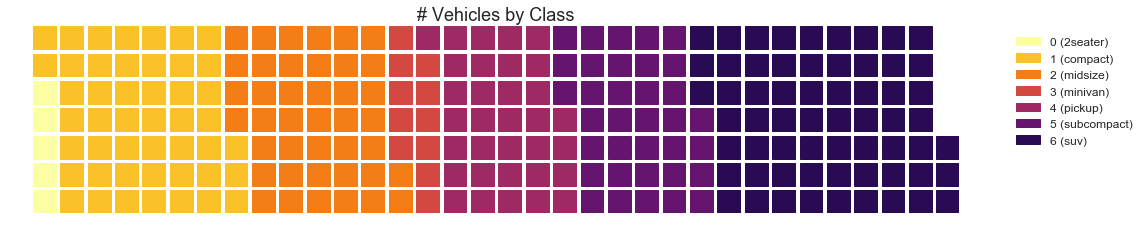

In [8]:
# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df['counts'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in df[['class', 'counts']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=7,
    colors=colors,
    figsize=(16, 9)
)

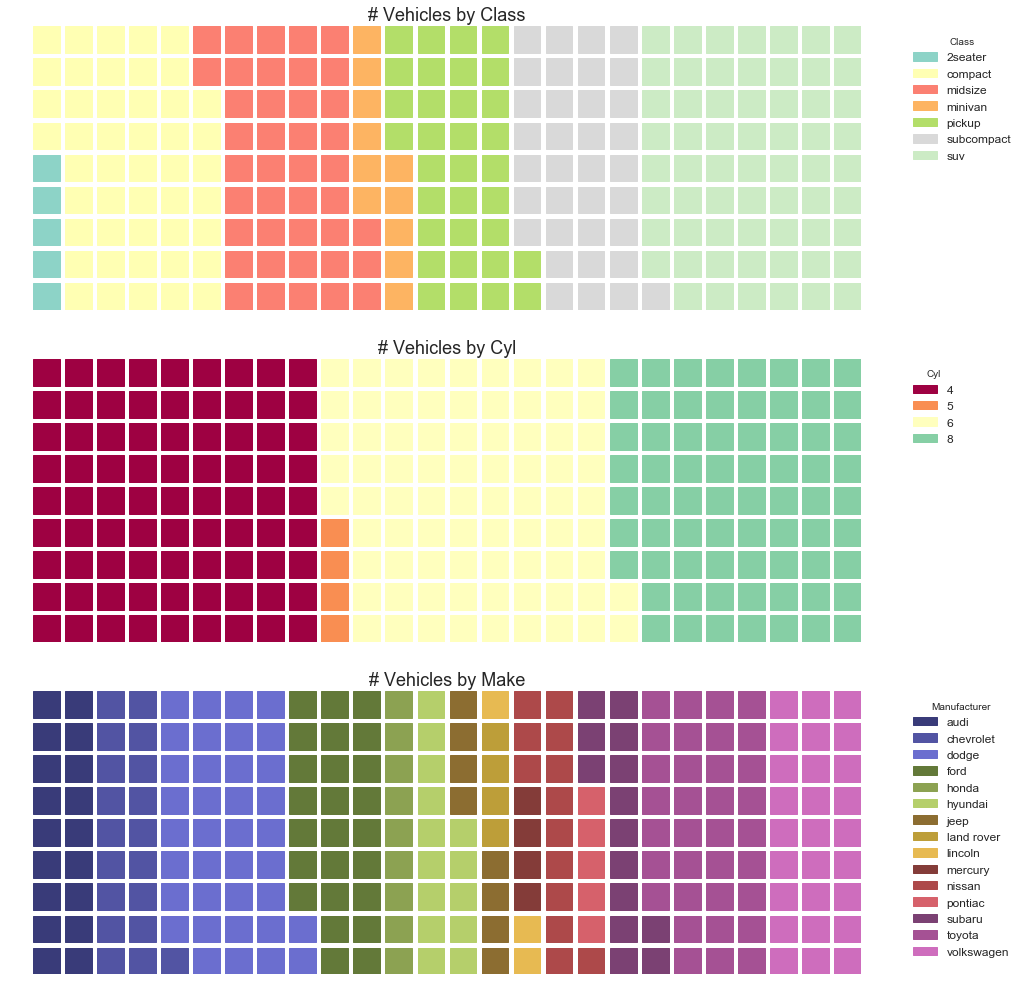

In [9]:
# Prepare Data
# By Class Data
df_class = df_raw.groupby('class').size().reset_index(name='counts_class')
n_categories = df_class.shape[0]
colors_class = [plt.cm.Set3(i/float(n_categories)) for i in range(n_categories)]

# By Cylinders Data
df_cyl = df_raw.groupby('cyl').size().reset_index(name='counts_cyl')
n_categories = df_cyl.shape[0]
colors_cyl = [plt.cm.Spectral(i/float(n_categories)) for i in range(n_categories)]

# By Make Data
df_make = df_raw.groupby('manufacturer').size().reset_index(name='counts_make')
n_categories = df_make.shape[0]
colors_make = [plt.cm.tab20b(i/float(n_categories)) for i in range(n_categories)]


# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '311': {
            'values': df_class['counts_class'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_class[['class', 'counts_class']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Class'},
            'title': {'label': '# Vehicles by Class', 'loc': 'center', 'fontsize':18},
            'colors': colors_class
        },
        '312': {
            'values': df_cyl['counts_cyl'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_cyl[['cyl', 'counts_cyl']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Cyl'},
            'title': {'label': '# Vehicles by Cyl', 'loc': 'center', 'fontsize':18},
            'colors': colors_cyl
        },
        '313': {
            'values': df_make['counts_make'],
            'labels': ["{1}".format(n[0], n[1]) for n in df_make[['manufacturer', 'counts_make']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12, 'title':'Manufacturer'},
            'title': {'label': '# Vehicles by Make', 'loc': 'center', 'fontsize':18},
            'colors': colors_make
        }
    },
    rows=9,
    figsize=(16, 14)
)